In [1]:
import cv2
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, LSTM

In [2]:
image_gen = ImageDataGenerator(#rotation_range=30, # rotate the image 30 degrees
                               #width_shift_range=0.1, # Shift the pic width by a max of 10%
                               #height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               #zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               #fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [3]:
image_gen.flow_from_directory('binaryActionsOnFeetVsSit/train')
image_gen.flow_from_directory('binaryActionsOnFeetVsSit/test')

Found 301 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [4]:
# width,height,channels
image_shape = (150,150,3)

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, binary!
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', #binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [17]:
batch_size = 4

train_image_gen = image_gen.flow_from_directory('binaryActionsOnFeetVsSit/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('binaryActionsOnFeetVsSit/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 301 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [18]:
train_image_gen.class_indices

{'onFeet': 0, 'sit': 1}

C:\Users\tsega\AppData\Local\Temp\ipykernel_6040\762426201.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=15,


Epoch 1/15
19/19 [==============================] - 35s 2s/step - loss: 0.7420 - accuracy: 0.6611 - val_loss: 0.3481 - val_accuracy: 0.9079
Epoch 2/15
19/19 [==============================] - 18s 960ms/step - loss: 0.3117 - accuracy: 0.9003
Epoch 3/15
19/19 [==============================] - 17s 876ms/step - loss: 0.2149 - accuracy: 0.9336
Epoch 4/15
19/19 [==============================] - 17s 876ms/step - loss: 0.1352 - accuracy: 0.9502
Epoch 5/15
19/19 [==============================] - 17s 866ms/step - loss: 0.0965 - accuracy: 0.9635
Epoch 6/15
19/19 [==============================] - 17s 880ms/step - loss: 0.1134 - accuracy: 0.9701
Epoch 7/15
19/19 [==============================] - 17s 870ms/step - loss: 0.0340 - accuracy: 0.9900
Epoch 8/15
19/19 [==============================] - 11s 570ms/step - loss: 0.0565 - accuracy: 0.9867
Epoch 9/15
19/19 [==============================] - 17s 883ms/step - loss: 0.0277 - accuracy: 0.9934
Epoch 10/15
19/19 [==============================] -

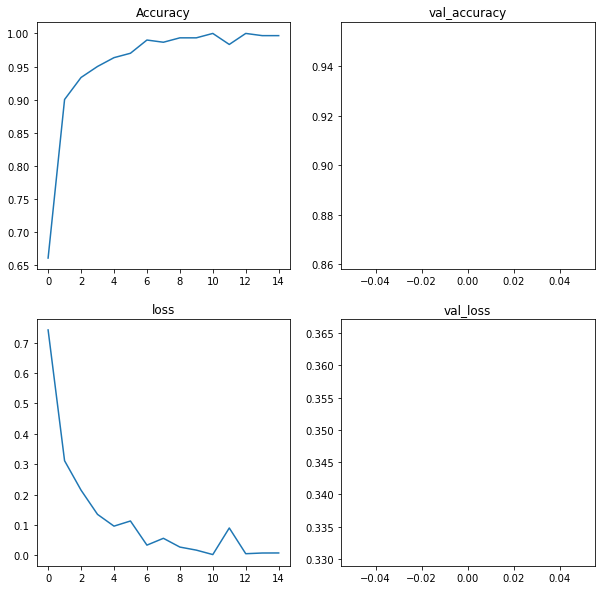

In [16]:
t = time.time()
results = model.fit_generator(train_image_gen,epochs=15,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)
print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

C:\Users\tsega\AppData\Local\Temp\ipykernel_6040\762426201.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=15,


Epoch 1/15
76/76 [==============================] - 22s 290ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.1158 - val_accuracy: 0.9792
Epoch 2/15
76/76 [==============================] - 21s 281ms/step - loss: 0.0080 - accuracy: 0.9967 - val_loss: 0.2268 - val_accuracy: 0.9792
Epoch 3/15
76/76 [==============================] - 21s 275ms/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 7.0443e-04 - val_accuracy: 1.0000
Epoch 4/15
76/76 [==============================] - 21s 277ms/step - loss: 2.2752e-04 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9792
Epoch 5/15
76/76 [==============================] - 21s 278ms/step - loss: 1.4039e-04 - accuracy: 1.0000 - val_loss: 0.3066 - val_accuracy: 0.9583
Epoch 6/15
76/76 [==============================] - 22s 290ms/step - loss: 8.0229e-04 - accuracy: 1.0000 - val_loss: 4.7721e-04 - val_accuracy: 1.0000
Epoch 7/15
76/76 [==============================] - 22s 291ms/step - loss: 0.0732 - accuracy: 0.9934 - val_loss: 6.7289e-0

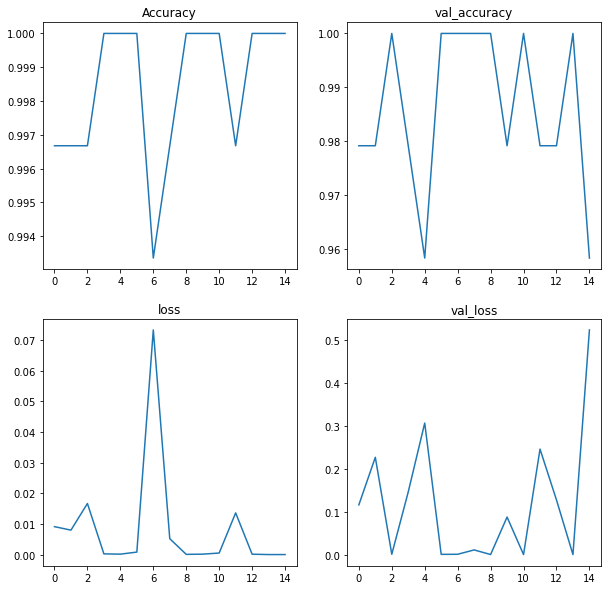

In [19]:
t = time.time()
results = model.fit_generator(train_image_gen,epochs=15,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)
print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

In [20]:
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

avg accuracy: 0.9984496156374614
avg val accuracy: 0.9861111164093017
